# Class for linear models
### Linear Regression
### Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Regression:
    def __init__(self):
        self._iterations = 2000
        self._learning_rate = 0.01
        self.theta = None
        self.cost = []
        
    def fit(self,X_train,y_train):
        m,n = X_train.shape
        self.theta = np.random.randn(n)
        X_with_bias = np.c_[np.ones(m),X_train]
        self.theta = np.insert(self.theta,0,0)
        
        for i in range(self._iterations):
            h = np.dot(X_with_bias,self.theta)
            error = h - y_train            
            J = (1/m)*np.sum(error**2)
            grad = (2/m)*np.dot(X_with_bias.T,error)
            self.theta = self.theta - self._learning_rate*grad
            self.cost.append(J)
        self.plot()

    def plot(self):
        plt.plot(self.cost)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
    
            
    def predict(self, X_test):        
        m_test = X_test.shape[0]
        X_test_bias = np.c_[np.ones(m_test),X_test]
        pred = np.dot(X_test_bias,self.theta)
        return pred

In [3]:
class Classification(Regression):
    def __init__(self):
        super().__init__()
        
    #Sigmoid function
    def sigmoid(self,x):
        z = 1/(1 + np.exp(-x))
        return z

    def fit(self,X,y):
        m,n = X.shape
        self.theta = np.random.randn(n) 
        X_with_bias = np.c_[np.ones(m),X] 
        self.theta = np.insert(self.theta,0,0)
        for i in range(self._iterations):
            h = np.dot(X_with_bias,self.theta)
            z = self.sigmoid(h)    
            J = (-1/m)*np.sum((y*np.log(z))+((1-y)*np.log(1-z)))
            error = z - y
            grad = (1/m)*np.dot(X_with_bias.T,error)
            self.theta =  self.theta - self._learning_rate*grad
            self.cost.append(J)
        self.plot()

    def predict(self, X_test):        
        m_test = X_test.shape[0]
        X_test_bias = np.c_[np.ones(m_test),X_test]
        pred = np.dot(X_test_bias,self.theta)
        return (pred >= 0.5 )*1


In [4]:
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

In [5]:
x, y = make_regression(n_samples = 200,n_features = 1,noise = 50,bias = 100,random_state = 0)

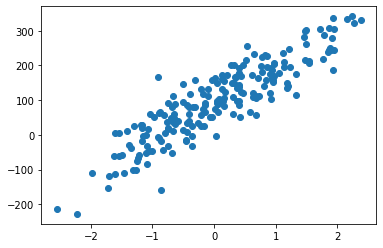

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 0)

In [8]:
linear = Regression()

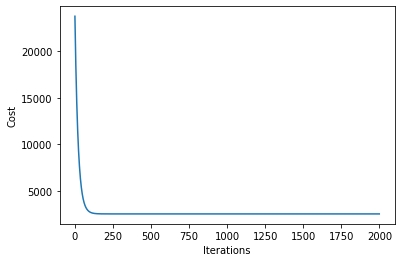

In [9]:
linear.fit(x_train,y_train)

In [10]:
preds = linear.predict(x_test)

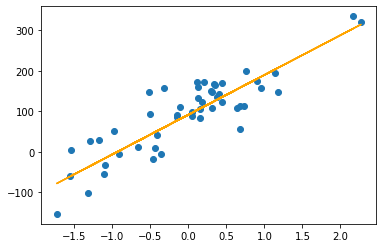

In [11]:
plt.scatter(x_test, y_test)
plt.plot(x_test, preds, color = 'orange')
plt.show()

In [12]:
x, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

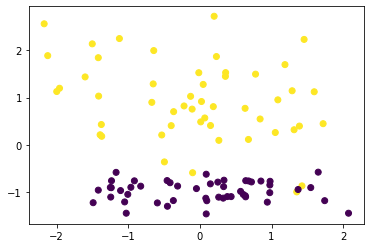

In [13]:
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

In [14]:
logistic_regression = Classification()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

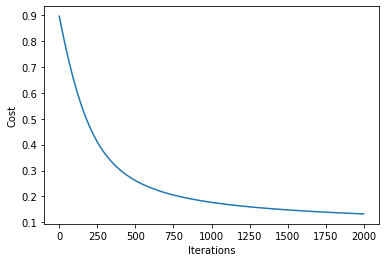

In [16]:
logistic_regression.fit(x_train, y_train)


In [17]:
preds = logistic_regression.predict(x_test)

In [18]:
theta = logistic_regression.theta

In [19]:
min_, max_ = np.min(x[:,0]), np.max(x[:,0])

In [20]:
boundary = -(np.dot(theta[1]/theta[2],[min_,max_]) - (theta[0] / theta[2]))
boundary

array([ 0.36541842, -0.12389946])

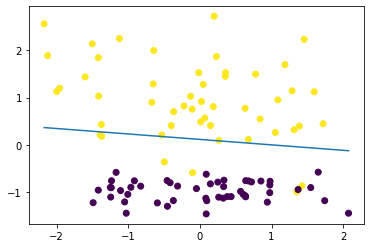

In [21]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.plot(np.array([min_,max_]),boundary)
plt.show()

In [22]:
preds

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

In [25]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
pred_s = log_reg.predict(x_test)

In [27]:
pred_s

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,pred_s)

0.92

In [30]:
accuracy_score(y_test,preds)

0.88